11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Testing data shape: (10000, 28, 28)


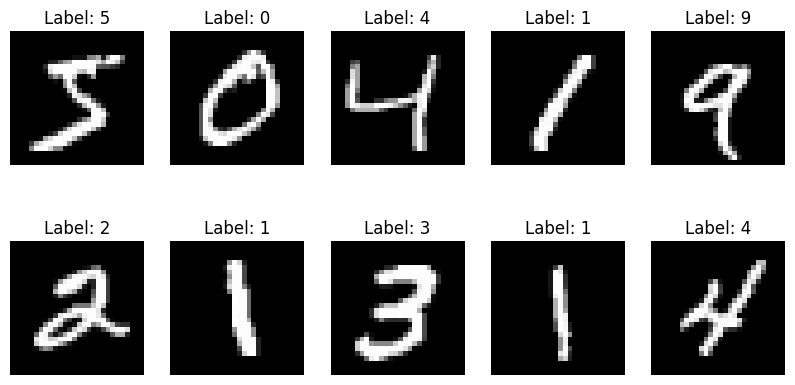

Training Dense Neural Network...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7450 - loss: 0.8307 - val_accuracy: 0.9463 - val_loss: 0.1845
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9297 - loss: 0.2352 - val_accuracy: 0.9619 - val_loss: 0.1339
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9511 - loss: 0.1631 - val_accuracy: 0.9666 - val_loss: 0.1149
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9604 - loss: 0.1328 - val_accuracy: 0.9698 - val_loss: 0.1012
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1108 - val_accuracy: 0.9718 - val_loss: 0.0970
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0957 - val_accuracy: 0.9738 - val_loss: 0.0907
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9734 - loss: 0.0874 - val_accuracy: 0.9753 - val_loss: 0.0829
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.0806 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7778 - loss: 0.7065 - val_accuracy: 0.9778 - val_loss: 0.0757
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9651 - loss: 0.1191 - val_accuracy: 0.9835 - val_loss: 0.0568
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9756 - loss: 0.0820 - val_accuracy: 0.9866 - val_loss: 0.0465
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9815 - loss: 0.0614 - val_accuracy: 0.9884 - val_loss: 0.0392
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9848 - loss: 0.0484 - val_accuracy: 0.9886 - val_loss: 0.0386
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9862 - loss: 0.0431 - val_accuracy: 0.9902 - val_loss: 0.0367
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9887 - loss: 0.0365 - val_accuracy: 0.9911 - val_loss: 0.0326
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9890 - loss: 0.0356 - val_accuracy: 0.

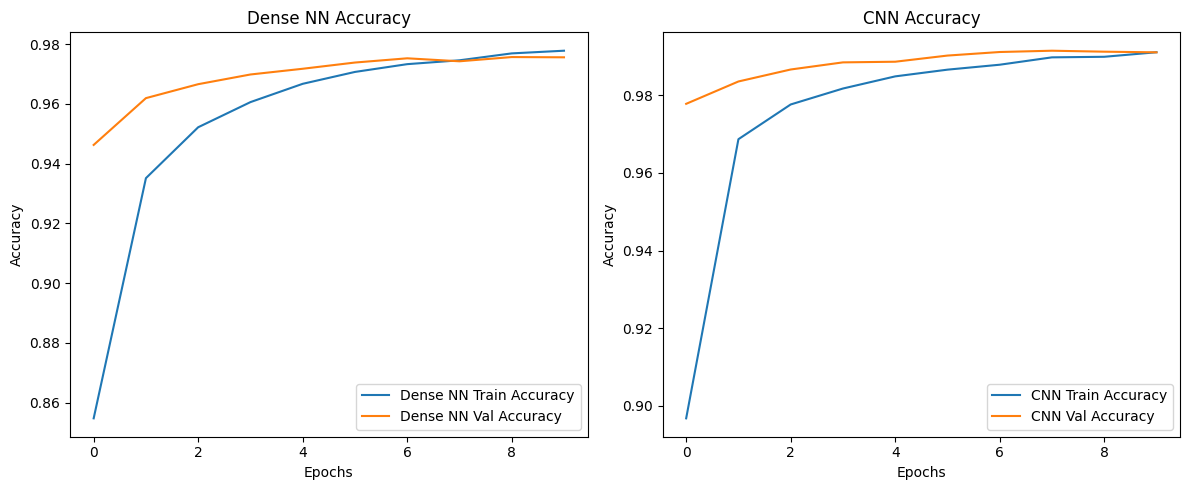

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Business Understanding
# Goal: Build a Dense NN and CNN to identify handwritten digits using the MNIST dataset.

# Step 2: Data Understanding
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

# Visualize some examples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Step 3: Data Preparation
# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 4: Modeling
# Dense NN Model
def create_dense_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# CNN Model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 5: Evaluation
# Train and evaluate Dense NN
print("Training Dense Neural Network...")
dense_model = create_dense_model()
dense_history = dense_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Train and evaluate CNN
print("Training Convolutional Neural Network...")
cnn_model = create_cnn_model()
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Step 6: Evaluation and Deployment
# Evaluate on test set
dense_test_loss, dense_test_acc = dense_model.evaluate(X_test, y_test, verbose=0)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)

print(f"Dense NN Test Accuracy: {dense_test_acc * 100:.2f}%")
print(f"CNN Test Accuracy: {cnn_test_acc * 100:.2f}%")

# Visualize training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(dense_history.history['accuracy'], label='Dense NN Train Accuracy')
plt.plot(dense_history.history['val_accuracy'], label='Dense NN Val Accuracy')
plt.title('Dense NN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


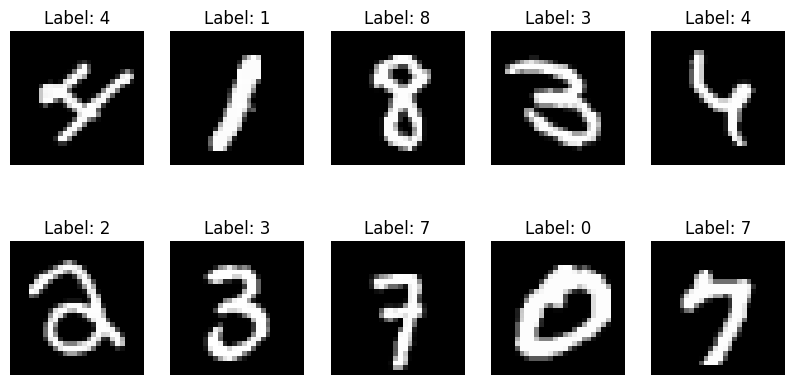

Training Dense Neural Network...
Epoch 1, Train Loss: 0.5529, Test Loss: 0.2397, Accuracy: 92.54%
Epoch 2, Train Loss: 0.2795, Test Loss: 0.1757, Accuracy: 94.73%
Epoch 3, Train Loss: 0.2194, Test Loss: 0.1446, Accuracy: 95.41%
Epoch 4, Train Loss: 0.1916, Test Loss: 0.1257, Accuracy: 96.17%
Epoch 5, Train Loss: 0.1739, Test Loss: 0.1091, Accuracy: 96.70%
Epoch 6, Train Loss: 0.1559, Test Loss: 0.1062, Accuracy: 96.71%
Epoch 7, Train Loss: 0.1482, Test Loss: 0.0947, Accuracy: 97.04%
Epoch 8, Train Loss: 0.1351, Test Loss: 0.0983, Accuracy: 97.05%
Epoch 9, Train Loss: 0.1290, Test Loss: 0.0958, Accuracy: 97.12%
Epoch 10, Train Loss: 0.1270, Test Loss: 0.0911, Accuracy: 97.17%
Training Convolutional Neural Network...
Epoch 1, Train Loss: 0.2957, Test Loss: 0.0545, Accuracy: 98.13%
Epoch 2, Train Loss: 0.0950, Test Loss: 0.0376, Accuracy: 98.69%
Epoch 3, Train Loss: 0.0681, Test Loss: 0.0328, Accuracy: 98.91%
Epoch 4, Train Loss: 0.0565, Test Loss: 0.0295, Accuracy: 98.94%
Epoch 5, Train 

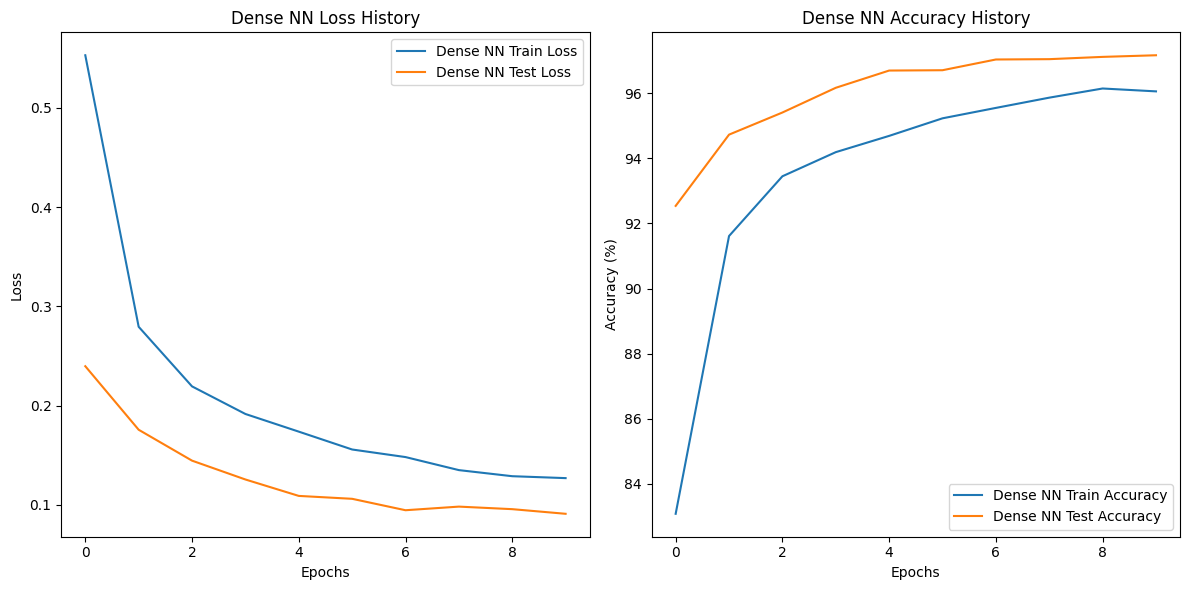

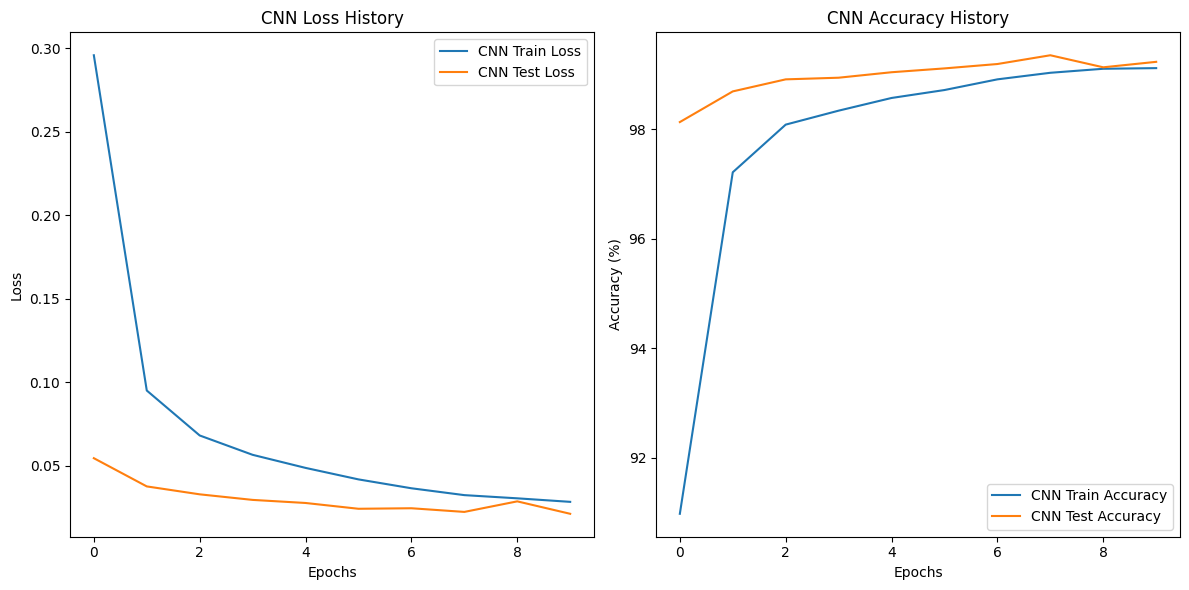

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Step 1: Business Understanding
# Goal: Build a Dense NN and CNN to identify handwritten digits using the MNIST dataset.

# Step 2: Data Understanding
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Visualize some examples
examples = iter(train_loader)
example_data, example_targets = next(examples)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(example_data[i][0], cmap="gray")
    plt.title(f"Label: {example_targets[i].item()}")
    plt.axis("off")
plt.show()

# Step 3: Data Preparation
# Data is already normalized and in PyTorch format.

# Step 4: Modeling
# Define Dense NN Model
class DenseNN(nn.Module):
    def __init__(self):
        super(DenseNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64*5*5, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Step 5: Evaluation
# Training function
def train_model(model, train_loader, criterion, optimizer, device, history):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    history['train_loss'].append(running_loss / len(train_loader))
    history['train_accuracy'].append(accuracy)
    return running_loss / len(train_loader)

# Evaluation function
def evaluate_model(model, test_loader, criterion, device, history):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    history['test_loss'].append(test_loss / len(test_loader))
    history['test_accuracy'].append(accuracy)
    return test_loss / len(test_loader), accuracy

# Initialize models, optimizers, and loss function
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dense_model = DenseNN().to(device)
cnn_model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
dense_optimizer = optim.Adam(dense_model.parameters(), lr=0.001)
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Histories
dense_history = {'train_loss': [], 'test_loss': [], 'train_accuracy': [], 'test_accuracy': []}
cnn_history = {'train_loss': [], 'test_loss': [], 'train_accuracy': [], 'test_accuracy': []}

# Train and evaluate Dense NN
print("Training Dense Neural Network...")
for epoch in range(10):
    train_loss = train_model(dense_model, train_loader, criterion, dense_optimizer, device, dense_history)
    test_loss, accuracy = evaluate_model(dense_model, test_loader, criterion, device, dense_history)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Train and evaluate CNN
print("Training Convolutional Neural Network...")
for epoch in range(10):
    train_loss = train_model(cnn_model, train_loader, criterion, cnn_optimizer, device, cnn_history)
    test_loss, accuracy = evaluate_model(cnn_model, test_loader, criterion, device, cnn_history)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Visualize training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(dense_history['train_loss'], label='Dense NN Train Loss')
plt.plot(dense_history['test_loss'], label='Dense NN Test Loss')
plt.title('Dense NN Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(dense_history['train_accuracy'], label='Dense NN Train Accuracy')
plt.plot(dense_history['test_accuracy'], label='Dense NN Test Accuracy')
plt.title('Dense NN Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history['train_loss'], label='CNN Train Loss')
plt.plot(cnn_history['test_loss'], label='CNN Test Loss')
plt.title('CNN Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history['train_accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history['test_accuracy'], label='CNN Test Accuracy')
plt.title('CNN Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 56.4 MB/s eta 0:00:00


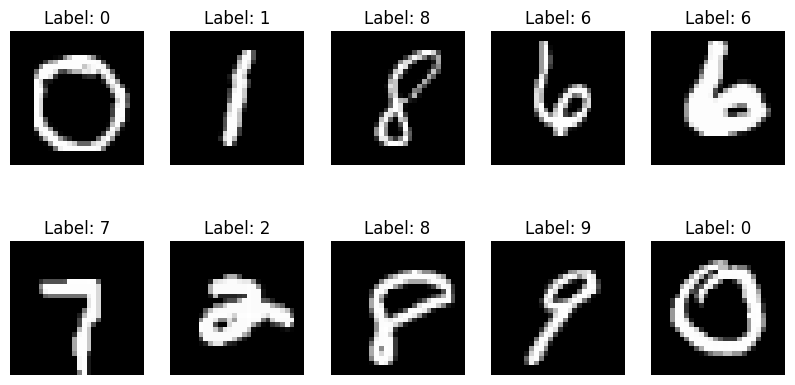

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type    | Params | Mode 
---------------------------------------------
0 | flatten  | Flatten | 0      | train
1 | fc1      | Linear  | 100 K  | train
2 | dropout1 | Dropout | 0      | train
3 | fc2      | Linear  | 8.3 K  | train
4 | dropout2 | Dropout | 0      | train
5 | fc3      | Linear  | 650    | train
---------------------------------------------
109 K  

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9700999855995178     │
│         test_loss         │    0.09813323616981506    │
└───────────────────────────┴───────────────────────────┘

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type      | Params | Mode 
----------------------------------------------
0 | conv1   | Conv2d    | 320    | train
1 | pool1   | MaxPool2d | 0      | train
2 | conv2   | Conv2d    | 18.5 K | train
3 | pool2   | MaxPool2d | 0      | train
4 | flatten | Flatten   | 0      | train
5 | fc1     | Linear    | 204 K  | train
6 | dropout | Dropout   | 0      | train
7 | fc2     | Linear    | 1.3 K  | train
----------------------------------------------
225 K     Trainable params
0         Non-trainable params
225 K     Total params
0.900     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9923999905586243     │
│         test_loss         │   0.022517185658216476    │
└───────────────────────────┴───────────────────────────┘

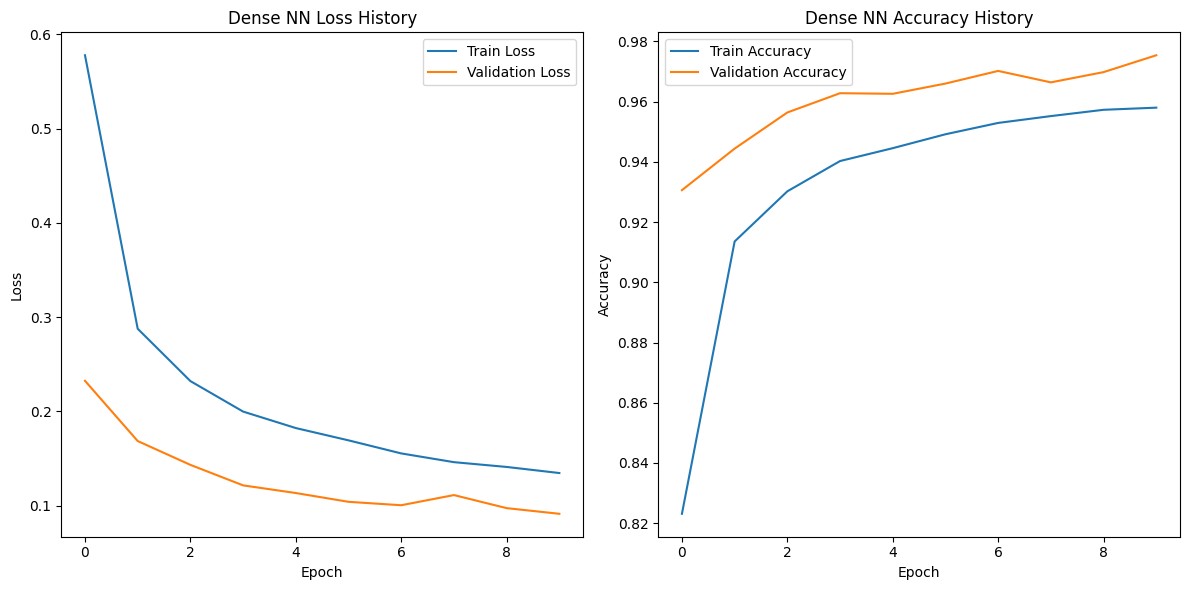

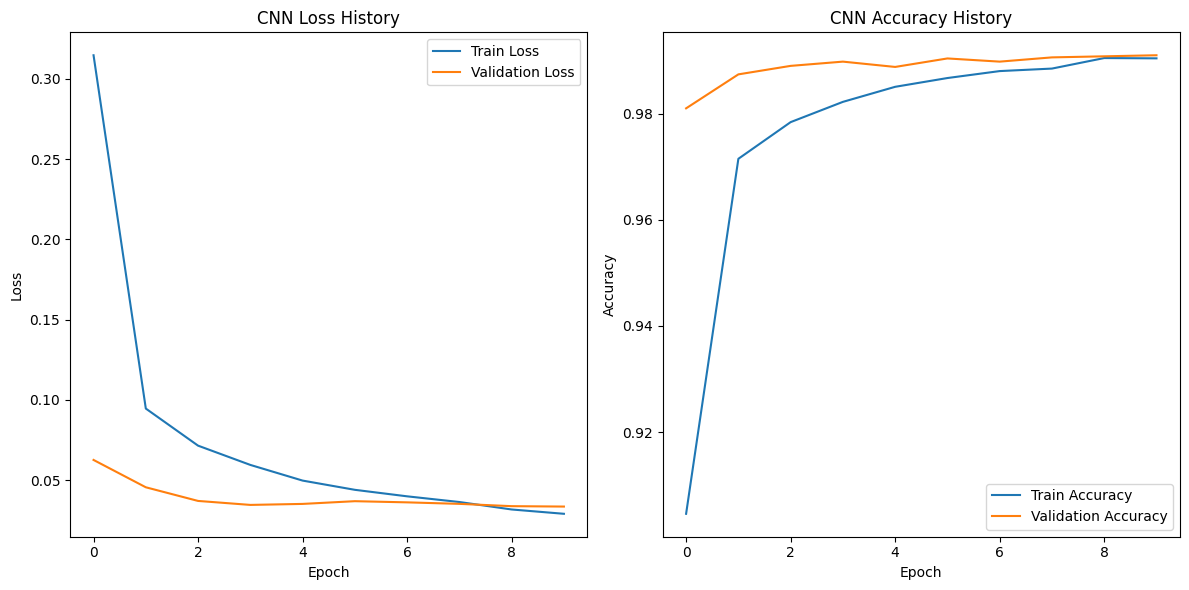

In [10]:
import numpy as np
import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Step 1: Business Understanding
# Goal: Build a Dense NN and CNN to identify handwritten digits using the MNIST dataset.

# Step 2: Data Understanding
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_data = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_data = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_data, val_data = random_split(mnist_data, [55000, 5000])

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
val_loader = DataLoader(val_data, batch_size=128)
test_loader = DataLoader(test_data, batch_size=128)

# Visualize some examples
examples = iter(train_loader)
example_data, example_targets = next(examples)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(example_data[i][0], cmap="gray")
    plt.title(f"Label: {example_targets[i].item()}")
    plt.axis("off")
plt.show()

# Step 3: Data Preparation
# Data is already normalized and in PyTorch format.

# Step 4: Modeling
# Define Dense NN Model
class DenseNN(pl.LightningModule):
    def __init__(self):
        super(DenseNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log("train_loss", loss, on_step=False, on_epoch=True)
        self.log("train_acc", acc, on_step=False, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, on_step=False, on_epoch=True)
        self.log("val_acc", acc, on_step=False, on_epoch=True)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log("test_loss", loss, on_step=False, on_epoch=True)
        self.log("test_acc", acc, on_step=False, on_epoch=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

# Define CNN Model
class CNN(pl.LightningModule):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64*5*5, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log("train_loss", loss, on_step=False, on_epoch=True)
        self.log("train_acc", acc, on_step=False, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, on_step=False, on_epoch=True)
        self.log("val_acc", acc, on_step=False, on_epoch=True)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log("test_loss", loss, on_step=False, on_epoch=True)
        self.log("test_acc", acc, on_step=False, on_epoch=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

# Step 5: Training and Evaluation
# Initialize models
dense_model = DenseNN()
cnn_model = CNN()

# Initialize trainers
dense_trainer = pl.Trainer(max_epochs=10, log_every_n_steps=1, callbacks=[TrainingHistoryCallback()])
cnn_trainer = pl.Trainer(max_epochs=10, log_every_n_steps=1, callbacks=[TrainingHistoryCallback()])

# Train Dense NN
dense_trainer.fit(dense_model, train_dataloaders=train_loader, val_dataloaders=val_loader)
dense_trainer.test(dense_model, dataloaders=test_loader)

# Train CNN
cnn_trainer.fit(cnn_model, train_dataloaders=train_loader, val_dataloaders=val_loader)
cnn_trainer.test(cnn_model, dataloaders=test_loader)

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(dense_trainer.callbacks[0].history["train_loss"], label="Train Loss")
plt.plot(dense_trainer.callbacks[0].history["val_loss"], label="Validation Loss")
plt.title("Dense NN Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(dense_trainer.callbacks[0].history["train_acc"], label="Train Accuracy")
plt.plot(dense_trainer.callbacks[0].history["val_acc"], label="Validation Accuracy")
plt.title("Dense NN Accuracy History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_trainer.callbacks[0].history["train_loss"], label="Train Loss")
plt.plot(cnn_trainer.callbacks[0].history["val_loss"], label="Validation Loss")
plt.title("CNN Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_trainer.callbacks[0].history["train_acc"], label="Train Accuracy")
plt.plot(cnn_trainer.callbacks[0].history["val_acc"], label="Validation Accuracy")
plt.title("CNN Accuracy History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()